# STATISTICAL ANALYSIS

## 1. Data preparation

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

benchmarking= pd.read_table('clean_metadata_benchmarking')
training = pd.read_table('clean_metadata_training')


We create a unique dataframe, taking into account the different provenience of the entries.

In [3]:
# create a new column referring to the belonging dataset
training['dataset'] = 'training'
benchmarking['dataset'] = 'benchmarking'

#concatenate the training and benchmarking, to have a new dataset (this to use smartly seaborn)
both = pd.concat((training, benchmarking),ignore_index=True) #10616

## 2. Analyses

### 2.1 Distribution of Signal Peptides lenght (benchmarking and testing)

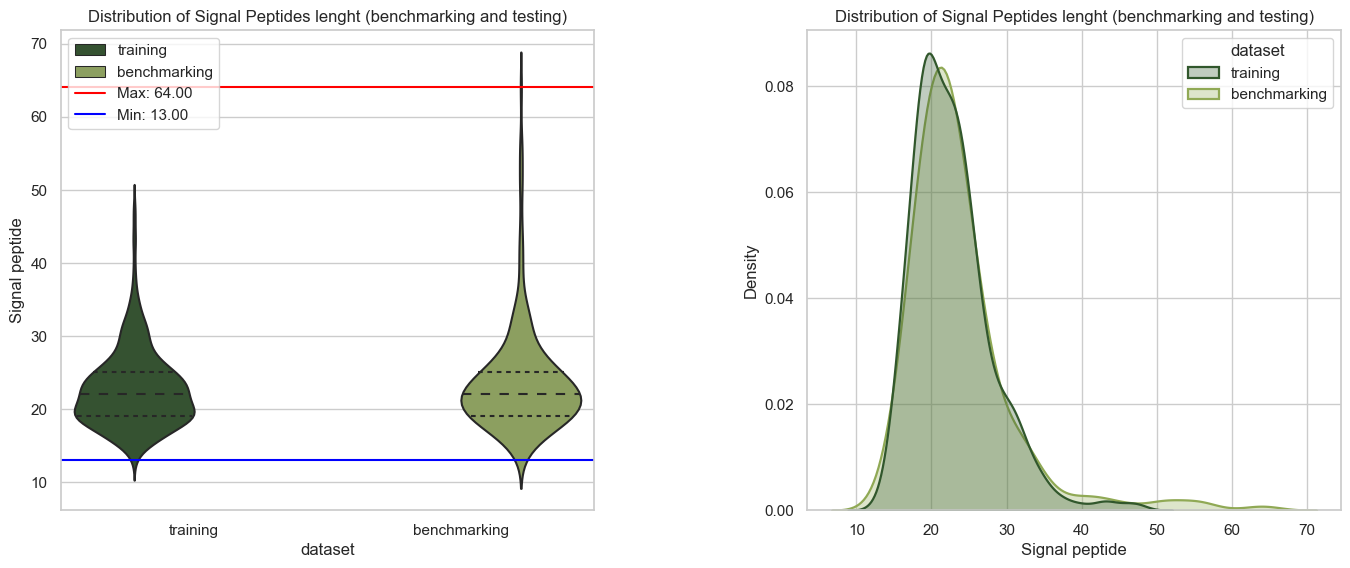

In [4]:
sns.set(style="whitegrid")

fig, ax =plt.subplots(1,2,figsize=(16, 6))#96DA72
#sns.set(rc={"figure.figsize":(10, 10)})

sns.violinplot(both, hue='dataset', x='dataset', y='Signal peptide', width=0.9, ax=ax[0],legend='upper center', inner='quartile',palette=['#31572c','#90a955'], shrink=2)
ax[0].set_title("Distribution of Signal Peptides lenght (benchmarking and testing)")
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels, title="dataset", loc="upper left")


sns.kdeplot(data=both, x="Signal peptide", hue="dataset", common_norm=False, fill=True, ax=ax[1], palette=['#31572c','#90a955'], alpha=0.3, linewidth = 1.6)
ax[1].set_title("Distribution of Signal Peptides lenght (benchmarking and testing)")

# Add maximum and minimum lines
max_value = both['Signal peptide'].max()
min_value = both['Signal peptide'].min()


ax[0].axhline(y=max_value, color='red', linestyle='solid', label=f'Max: {max_value:.2f}')
ax[0].axhline(y=min_value, color='blue', linestyle='solid', label=f'Min: {min_value:.2f}')
ax[0].legend(loc="upper left")


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.savefig('figures/data_preparation/SP_length.svg')



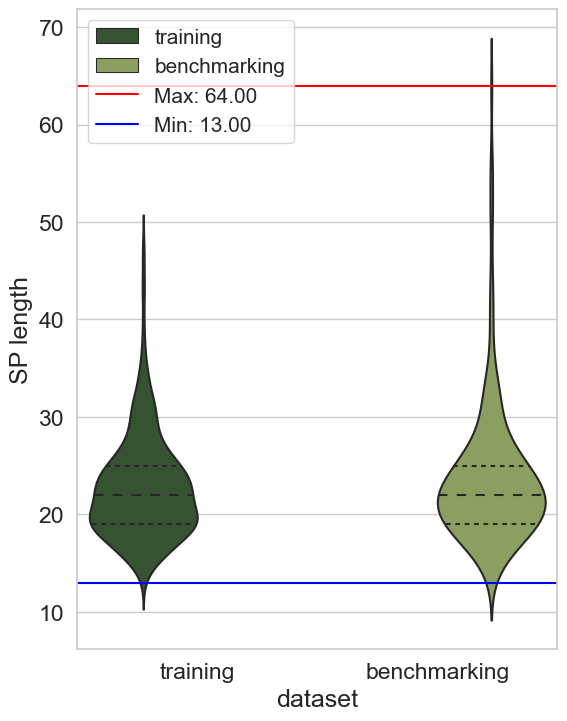

In [23]:
sns.set(style="whitegrid",font_scale = 1.5)

fig, ax = plt.subplots(figsize=(6, 8))  # Adjusted to a single subplot
# sns.set(rc={"figure.figsize":(10, 10)})

sns.violinplot(both, hue='dataset', x='dataset', y='Signal peptide', width=0.9, ax=ax, legend='upper center',
               inner='quartile', palette=['#31572c', '#90a955'], shrink=2)
#ax.set_title("Distribution of Signal Peptides length (benchmarking and testing)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="dataset", loc="upper left",fontsize=20)
plt.xlabel('dataset',fontsize=18)
plt.ylabel('SP length',fontsize=18)

# Add maximum and minimum lines
max_value = both['Signal peptide'].max()
min_value = both['Signal peptide'].min()

ax.axhline(y=max_value, color='red', linestyle='solid', label=f'Max: {max_value:.2f}')
ax.axhline(y=min_value, color='blue', linestyle='solid', label=f'Min: {min_value:.2f}')
ax.legend(loc="upper left",fontsize=15)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.savefig('figures/data_preparation/SP_length2.svg')

In [7]:
avg_value = both['Signal peptide'].mean()
avg_value

22.919487648673375

In the benchmarking there is a bit more variability, being the sample smaller. Overall, the distribution are quite similar.
- min lenght = 13
- max lenght = 64



### 2.2 Distribution of protein lengths 
- positives VS negatives
- benchmarking VS training

Here we add a column which flag positives and negatives, based on the presence of the signal peptide

In [8]:
both['class'] = 'negatives'
both.loc[both['Signal peptide'].notna(), 'class'] = 'positives'
both
#and create two different datasets for positive and negative
positives = both[both['class']=='positives']
negatives = both[both['class']=='negatives']

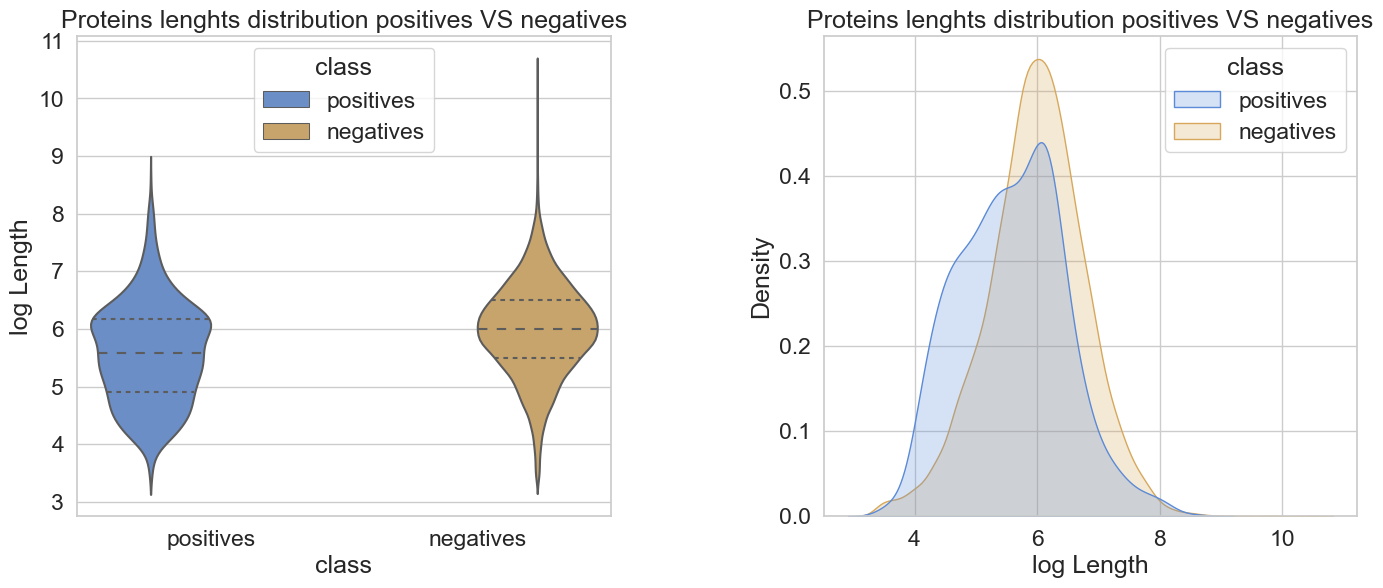

In [9]:
#Positives vs negatives
fig, ax =plt.subplots(1,2,figsize=(16, 6))

both['log Length']= np.log(both['Length'])

sns.violinplot(both, hue='class', x='class', y='log Length', width=0.9, ax=ax[0], ylabel='log Length',inner='quartile',palette = ['#5B8AD7','#D7A85B'])
ax[0].set_title("Proteins lenghts distribution positives VS negatives")
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels, title="class", loc="upper center")


sns.kdeplot(data=both, x="log Length", hue="class", common_norm=False, fill=True, ax=ax[1],palette = ['#5B8AD7','#D7A85B'])
ax[1].set_title("Proteins lenghts distribution positives VS negatives")



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)



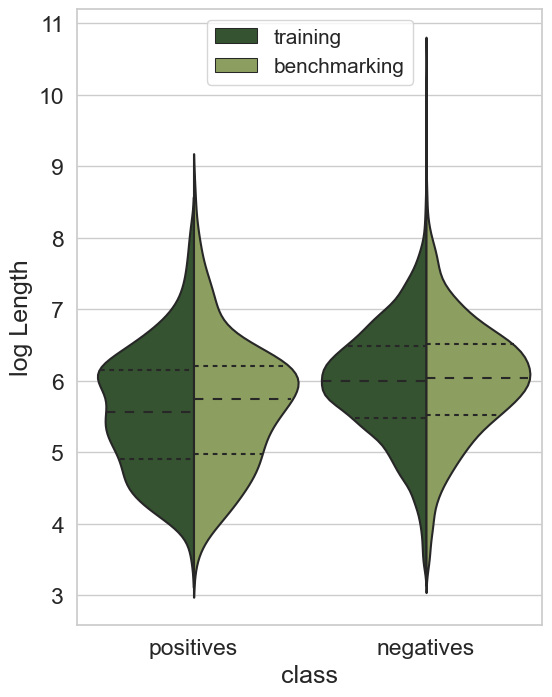

In [18]:
sns.set(style="whitegrid",font_scale = 1.5)
plt.figure(figsize=(6, 8))

both['log Length']= np.log(both['Length'])

sns.violinplot(both, hue='dataset', x='class', y='log Length', width=0.9, split = True, ylabel='log Length',inner='quartile',palette=['#31572c','#90a955'], alpha = 0.2)


plt.xlabel('class',fontsize=18)
plt.ylabel('log Length',fontsize=18)
#plt.title('log Length distribution among the datasets and the classes')
plt.legend(loc='upper center',fontsize=15)
plt.savefig('figures/data_preparation/protein_length.svg')



### 2.3 Comparing amino acid composition of SPs against a background distribution

Create 2 dictionaries, one with the frequencies of the amino acids in SwissProt, and one with the frequencies of the amino acids in the Signal Peptides.
From these dictionaries, we create 2 dataframes, and then concatenate them.

In [ ]:
#background frequencies 
data = {'aa': ['A', 'Q', 'L', 'S', 'R', 'E', 'K', 'T', 'N', 'G', 'M', 'W', 'D', 'H', 'F', 'Y', 'C', 'I', 'P', 'V'],
    'freq': [8.25, 3.93, 9.65, 6.65, 5.53, 6.72, 5.80, 5.36, 4.06, 7.07, 2.41, 1.10, 5.46, 2.27, 3.86, 2.92, 1.38, 5.91, 4.74, 6.85]}
sw_freq = pd.DataFrame(data)
sw_freq['dataset'] = 'SW'

#SPs frequencies
count_aa = {
    "A": 0,
    "R": 0,
    "N": 0,
    "D": 0,
    "C": 0,
    "Q": 0,
    "E": 0,
    "G": 0,
    "H": 0,
    "I": 0,
    "L": 0,
    "K": 0,
    "M": 0,
    "F": 0,
    "P": 0,
    "S": 0,
    "T": 0,
    "W": 0,
    "Y": 0,
    "V": 0,
    'X': 0,
    'U': 0,
    'Z': 0,
}


for index, row in both.iterrows():
    if pd.notna(row['Signal peptide']): 
        for aa in row['Sequence'][:int(row['Signal peptide'])]:
            count_aa[aa] += 1

strange_aa = ['X','U','Z']
for key in strange_aa:
        count_aa.pop(key)

#print(count_aa)
total_count = sum(count_aa.values())
amino_acid_frequencies = {}
for amino_acid, count in count_aa.items():
    frequency = (count / total_count)*100
    amino_acid_frequencies[amino_acid] = frequency

#print(amino_acid_frequencies)  
SP_freq = pd.DataFrame(list(amino_acid_frequencies.items()), columns=['aa', 'freq'])
SP_freq['dataset'] = 'SP'


df2 = pd.concat([SP_freq,sw_freq],ignore_index=True)
print(df2)

   aa       freq dataset
0   A  14.169329      SP
1   R   3.270767      SP
2   N   1.026358      SP
3   D   0.850639      SP
4   C   2.887380      SP
5   Q   2.028754      SP
6   E   1.377796      SP
7   G   5.998403      SP
8   H   1.114217      SP
9   I   4.540735      SP
10  L  22.032748      SP
11  K   2.244409      SP
12  M   6.285942      SP
13  F   5.003994      SP
14  P   4.133387      SP
15  S   7.444089      SP
16  T   4.532748      SP
17  W   1.749201      SP
18  Y   1.046326      SP
19  V   8.262780      SP
20  A   8.250000      SW
21  Q   3.930000      SW
22  L   9.650000      SW
23  S   6.650000      SW
24  R   5.530000      SW
25  E   6.720000      SW
26  K   5.800000      SW
27  T   5.360000      SW
28  N   4.060000      SW
29  G   7.070000      SW
30  M   2.410000      SW
31  W   1.100000      SW
32  D   5.460000      SW
33  H   2.270000      SW
34  F   3.860000      SW
35  Y   2.920000      SW
36  C   1.380000      SW
37  I   5.910000      SW
38  P   4.740000      SW


When comparing the amino acid composition it can be helpful to highlight the the physical-chemical properties of the amino acids.


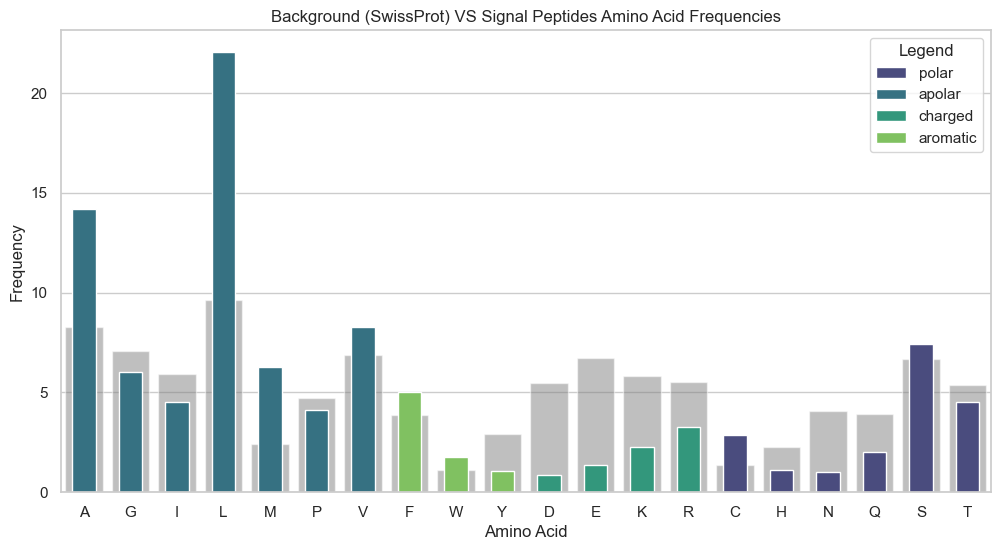

In [ ]:

# Define a dictionary to map amino acids to their groups
amino_acid_groups = {
    'A': 'apolar',
    'C': 'polar',
    'D': 'charged',
    'E': 'charged',
    'F': 'aromatic',
    'G': 'apolar',
    'H': 'polar',
    'I': 'apolar',
    'K': 'charged',
    'L': 'apolar',
    'M': 'apolar',
    'N': 'polar',
    'P': 'apolar',
    'Q': 'polar',
    'R': 'charged',
    'S': 'polar',
    'T': 'polar',
    'V': 'apolar',
    'W': 'aromatic',
    'Y': 'aromatic'
}

# Add a 'Group' column based on the dictionary
SP_freq['Group'] = SP_freq['aa'].map(amino_acid_groups)
sw_freq['Group'] = sw_freq['aa'].map(amino_acid_groups)

# Define the order of groups for sorting
group_order = ['polar', 'apolar', 'charged','aromatic']  # Adjust this as needed

# Sort the DataFrames by 'Group' and within each group by 'Amino Acid'
SP_freq = SP_freq.sort_values(['Group', 'aa'])
sw_freq = sw_freq.sort_values(['Group', 'aa'])

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(data=sw_freq, x='aa', y='freq', palette=['grey'] , hue_order=group_order, dodge=False, width=0.8, alpha=0.5)
sns.barplot(data=SP_freq, x='aa', y='freq', hue='Group', palette='viridis', hue_order=group_order, dodge=False, width=0.5)


plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Background (SwissProt) VS Signal Peptides Amino Acid Frequencies')
plt.legend(title='Legend', loc='upper right')




To make a fair comparison, instead of using the entire Swissprot dataset (which includes also prokaryiota) we compare the aminoacid composition between the SP and the eukaryiotic proteins present in Swissprot.

In [ ]:
#create a dataframe with the frequencies in the eukaryotic proteins
eukaryota = pd.read_table('eukariota.tsv')

count_aa_euk = {
    "A": 0,
    "R": 0,
    "N": 0,
    "D": 0,
    "C": 0,
    "Q": 0,
    "E": 0,
    "G": 0,
    "H": 0,
    "I": 0,
    "L": 0,
    "K": 0,
    "M": 0,
    "F": 0,
    "P": 0,
    "S": 0,
    "T": 0,
    "W": 0,
    "Y": 0,
    "V": 0,
    'X': 0,
    'U': 0,
    'Z': 0,
    'B':0,
}


for index, row in eukaryota.iterrows():
        for aa in row['Sequence']:
            count_aa_euk[aa] += 1

strange_aa = ['X','U','Z','B']
for key in strange_aa:
        count_aa_euk.pop(key)


total_count = sum(count_aa_euk.values())
amino_acid_frequencies_euk = {}
for amino_acid, count in count_aa_euk.items():
    frequency = (count / total_count)*100
    amino_acid_frequencies_euk[amino_acid] = frequency

#print(amino_acid_frequencies)  
euk_freq = pd.DataFrame(list(amino_acid_frequencies_euk.items()), columns=['aa', 'freq'])
euk_freq['dataset'] = 'euk'



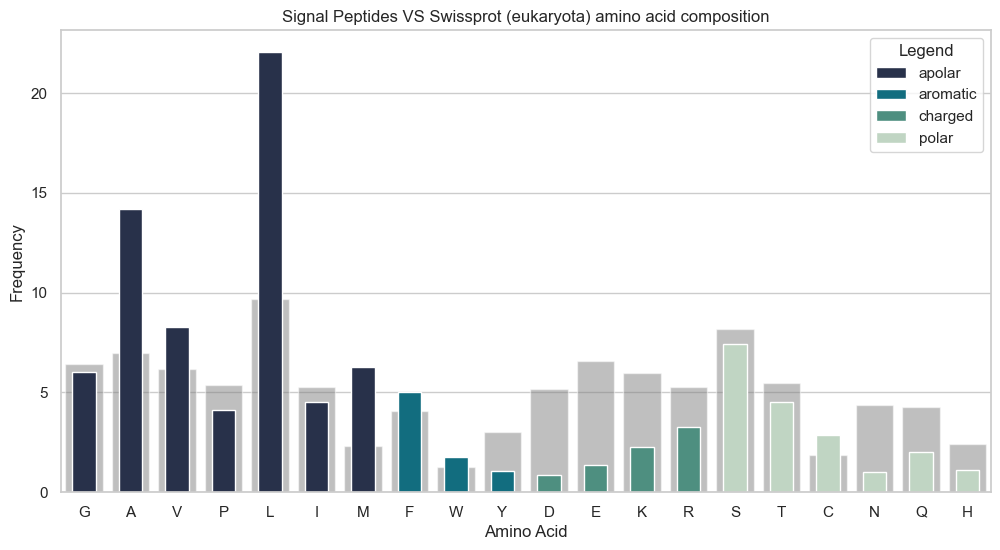

In [ ]:
# Define a dictionary to map amino acids to their groups
amino_acid_groups = {
    'A': 'apolar',
    'C': 'polar',
    'D': 'charged',
    'E': 'charged',
    'F': 'aromatic',
    'G': 'apolar',
    'H': 'polar',
    'I': 'apolar',
    'K': 'charged',
    'L': 'apolar',
    'M': 'apolar',
    'N': 'polar',
    'P': 'apolar',
    'Q': 'polar',
    'R': 'charged',
    'S': 'polar',
    'T': 'polar',
    'V': 'apolar',
    'W': 'aromatic',
    'Y': 'aromatic'
}

# Add a 'Group' column based on the dictionary
euk_freq['Group'] = euk_freq['aa'].map(amino_acid_groups)

# Define the order of groups for sorting
group_order = ['polar', 'apolar', 'charged','aromatic']  
aa_order = ['G','A','V','P','L','I','M','F','W','Y','D','E','K','R','S','T','C','N','Q','H']

# Sort the DataFrames by 'Group' and within each group by 'Amino Acid'
SP_freq = SP_freq.sort_values(['Group', 'aa'])
euk_freq = euk_freq.sort_values(['Group', 'aa'])

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(data=euk_freq, x='aa', y='freq', palette=['grey'] , order=aa_order, dodge=False, width=0.8, alpha=0.5)
sns.barplot(data=SP_freq, x='aa', y='freq', hue='Group', palette=['#222E50','#007991','#439A86','#BCD8C1'], order=aa_order, dodge=False, width=0.5)


plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Signal Peptides VS Swissprot (eukaryota) amino acid composition')
plt.legend(title='Legend', loc='upper right')




It is important also to search whether there are differences in the amino acid composition between the training and the benchmarking.
Thus, we create a dataframe with the frequencies of the amino acid both for the benchmarking and the training datasets respectively

In [ ]:
#BENCHMARKING
count_aa_benchmarking = {
    "A": 0,
    "R": 0,
    "N": 0,
    "D": 0,
    "C": 0,
    "Q": 0,
    "E": 0,
    "G": 0,
    "H": 0,
    "I": 0,
    "L": 0,
    "K": 0,
    "M": 0,
    "F": 0,
    "P": 0,
    "S": 0,
    "T": 0,
    "W": 0,
    "Y": 0,
    "V": 0,
    'X': 0,
    'U': 0,
    'Z': 0,
}


for index, row in benchmarking.iterrows():
    if pd.notna(row['Signal peptide']): 
        for aa in row['Sequence'][:int(row['Signal peptide'])]:
            count_aa_benchmarking[aa] += 1

strange_aa = ['X','U','Z']
for key in strange_aa:
        count_aa_benchmarking.pop(key)

total_count = sum(count_aa_benchmarking.values())
amino_acid_frequencies_benchmarking = {}
for amino_acid, count in count_aa_benchmarking.items():
    frequency = (count / total_count)*100
    amino_acid_frequencies_benchmarking[amino_acid] = frequency


bench_freq = pd.DataFrame(list(amino_acid_frequencies_benchmarking.items()), columns=['aa', 'freq'])
bench_freq['dataset'] = 'benchmarking'

# Add a 'Group' column based on the dictionary
bench_freq['Group'] = bench_freq['aa'].map(amino_acid_groups)

# Define the order of groups for sorting
group_order = ['polar', 'apolar', 'charged','aromatic']  

# Sort the DataFrames by 'Group' and within each group by 'Amino Acid'
bench = bench_freq.sort_values(['Group', 'aa'])


bench_freq



,aa,freq,dataset,Group
0,A,14.578104,benchmarking,apolar
1,R,3.494883,benchmarking,charged
2,N,0.965437,benchmarking,polar
3,D,0.946129,benchmarking,charged
4,C,3.031473,benchmarking,polar
5,Q,2.123962,benchmarking,polar
6,E,1.486774,benchmarking,charged
7,G,6.236725,benchmarking,apolar
8,H,1.100599,benchmarking,polar
9,I,3.900367,benchmarking,apolar


In [ ]:
#TRAINING
count_aa_training = {
    "A": 0,
    "R": 0,
    "N": 0,
    "D": 0,
    "C": 0,
    "Q": 0,
    "E": 0,
    "G": 0,
    "H": 0,
    "I": 0,
    "L": 0,
    "K": 0,
    "M": 0,
    "F": 0,
    "P": 0,
    "S": 0,
    "T": 0,
    "W": 0,
    "Y": 0,
    "V": 0,
    'X': 0,
    'U': 0,
    'Z': 0,
}


for index, row in training.iterrows():
    if pd.notna(row['Signal peptide']): 
        for aa in row['Sequence'][:int(row['Signal peptide'])]:
            count_aa_training[aa] += 1

strange_aa = ['X','U','Z']
for key in strange_aa:
        count_aa_training.pop(key)

total_count = sum(count_aa_training.values())
amino_acid_frequencies_training = {}
for amino_acid, count in count_aa_training.items():
    frequency = (count / total_count)*100
    amino_acid_frequencies_training[amino_acid] = frequency


train_freq = pd.DataFrame(list(amino_acid_frequencies_training.items()), columns=['aa', 'freq'])
train_freq['dataset'] = 'training'

# Add a 'Group' column based on the dictionary
train_freq['Group'] = train_freq['aa'].map(amino_acid_groups)

# Define the order of groups for sorting
group_order = ['polar', 'apolar','charged','aromatic']  

# Sort the DataFrames by 'Group' and within each group by 'Amino Acid'
train_freq = train_freq.sort_values(['Group', 'aa'])

train_freq



,aa,freq,dataset,Group
0,A,14.062736,training,apolar
7,G,5.936257,training,apolar
9,I,4.707719,training,apolar
10,L,22.048235,training,apolar
12,M,6.303811,training,apolar
14,P,4.078344,training,apolar
19,V,8.242284,training,apolar
13,F,5.060168,training,aromatic
17,W,1.711898,training,aromatic
18,Y,1.062384,training,aromatic


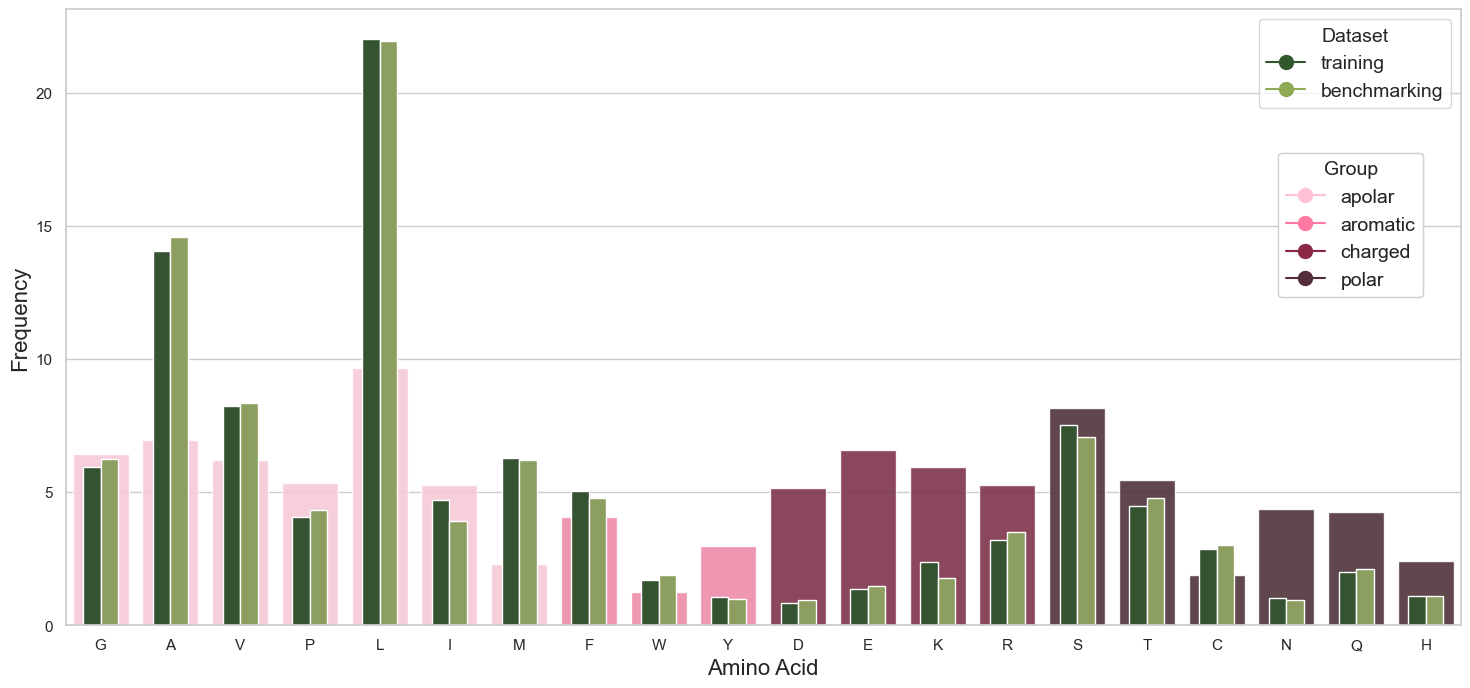

In [ ]:
#concatenate the training and the benchmarking datasets together
comparison = pd.concat([train_freq,bench_freq],ignore_index=True)

#plot the training and the benchmarking frequencies over the background frequencies
sns.set(style="whitegrid")
plt.figure(figsize=(18, 8))

sns.barplot(data=euk_freq, x='aa', y='freq',hue='Group', palette=['#ffc2d4','#ff7aa2','#8a2846','#522e38'], order=aa_order, dodge=False, width=0.8, alpha=0.9)
sns.barplot(data=comparison, x='aa', y='freq', hue='dataset', palette=['#31572c','#90a955'], width=0.5, order = aa_order)

#['#222E50','#007991','#439A86','#BCD8C1']['#ff9505','#ffc971']
plt.xlabel('Amino Acid',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
#plt.title('Differences in amino acid composition of the Signal Peptides in benchmarking and training datasets compared to the background ditribution (SwissProt-eukaryotes)')

# Define custom legend labels, colors, and marker styles (using 'o' for circular markers)
legend_labels1 = {'training': ('#31572c', 'o'), 'benchmarking': ('#90a955', 'o')}
legend_labels2 = {'apolar': ('#ffc2d4', 'o'), 'aromatic': ('#ff7aa2', 'o'), 'charged': ('#8a2846', 'o'), 'polar': ('#522e38', 'o')}

# Create custom legend handles (lines with circular markers) and labels for the first plot
legend_handles1 = [mlines.Line2D([], [], color=color, marker=marker, markersize=10, label=label) for label, (color, marker) in legend_labels1.items()]
legend_labels1 = list(legend_labels1.keys())  # Use the legend labels as-is

# Create custom legend handles (lines with circular markers) and labels for the second plot
legend_handles2 = [mlines.Line2D([], [], color=color, marker=marker, markersize=10, label=label) for label, (color, marker) in legend_labels2.items()]
legend_labels2 = list(legend_labels2.keys())  # Use the legend labels as-is

# Create a custom legend for the first plot
legend1 = plt.legend(handles=legend_handles1, title="Dataset", loc="upper right", labels=legend_labels1,fontsize=14)
legend1.get_title().set_fontsize('14')  # Adjust the legend title font size here

# Create a custom legend for the second plot
legend2 = plt.legend(handles=legend_handles2, title="Group", loc="center right", labels=legend_labels2,fontsize=14, bbox_to_anchor=(0.98, 0.65))
legend2.get_title().set_fontsize('14')  # Adjust the legend title font size here


# Add both legends to the plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

#plt.legend(title='Legend', loc='upper right')
plt.savefig('figures/data_preparation/SPresidue_composition(benvstra).svg')


#### Comparison of the aminoacid composition starting from residue 23 (average length of the SP) between positives and negatives

In [ ]:
#POSITIVES
count_aa_positives = {
    "A": 0,
    "R": 0,
    "N": 0,
    "D": 0,
    "C": 0,
    "Q": 0,
    "E": 0,
    "G": 0,
    "H": 0,
    "I": 0,
    "L": 0,
    "K": 0,
    "M": 0,
    "F": 0,
    "P": 0,
    "S": 0,
    "T": 0,
    "W": 0,
    "Y": 0,
    "V": 0,
    'X': 0,
    'U': 0,
    'Z': 0,
}


for index, row in positives.iterrows(): 
        for aa in row['Sequence']:
            count_aa_positives[aa] += 1

strange_aa = ['X','U','Z']
for key in strange_aa:
        count_aa_positives.pop(key)

total_count = sum(count_aa_positives.values())
amino_acid_frequencies_positives = {}
for amino_acid, count in count_aa_positives.items():
    frequency = (count / total_count)*100
    amino_acid_frequencies_positives[amino_acid] = frequency


pos_freq = pd.DataFrame(list(amino_acid_frequencies_positives.items()), columns=['aa', 'freq'])
pos_freq['class'] = 'positives'

# Add a 'Group' column based on the dictionary
pos_freq['Group'] = pos_freq['aa'].map(amino_acid_groups)

# Define the order of groups for sorting
group_order = ['polar', 'apolar', 'charged','aromatic']  

# Sort the DataFrames by 'Group' and within each group by 'Amino Acid'
pos = pos_freq.sort_values(['Group', 'aa'])
pos



,aa,freq,class,Group
0,A,7.373250,positives,apolar
7,G,8.047212,positives,apolar
9,I,4.412341,positives,apolar
10,L,9.204907,positives,apolar
12,M,1.865926,positives,apolar
14,P,5.924850,positives,apolar
19,V,6.485980,positives,apolar
13,F,3.890376,positives,aromatic
17,W,1.435112,positives,aromatic
18,Y,3.318755,positives,aromatic


In [ ]:
#NEGATIVES
count_aa_negatives = {
    "A": 0,
    "R": 0,
    "N": 0,
    "D": 0,
    "C": 0,
    "Q": 0,
    "E": 0,
    "G": 0,
    "H": 0,
    "I": 0,
    "L": 0,
    "K": 0,
    "M": 0,
    "F": 0,
    "P": 0,
    "S": 0,
    "T": 0,
    "W": 0,
    "Y": 0,
    "V": 0,
    'X': 0,
    'U': 0,
    'Z': 0,
}


for index, row in negatives.iterrows():
    for aa in row['Sequence']:
        count_aa_negatives[aa] += 1

strange_aa = ['X','U','Z']
for key in strange_aa:
        count_aa_negatives.pop(key)

total_count = sum(count_aa_negatives.values())
amino_acid_frequencies_negatives = {}
for amino_acid, count in count_aa_negatives.items():
    frequency = (count / total_count)*100
    amino_acid_frequencies_negatives[amino_acid] = frequency


neg_freq = pd.DataFrame(list(amino_acid_frequencies_negatives.items()), columns=['aa', 'freq'])
neg_freq['class'] = 'negatives'

# Add a 'Group' column based on the dictionary
neg_freq['Group'] = neg_freq['aa'].map(amino_acid_groups)

# Define the order of groups for sorting
group_order = ['polar', 'apolar', 'charged','aromatic']  

# Sort the DataFrames by 'Group' and within each group by 'Amino Acid'
neg = neg_freq.sort_values(['Group', 'aa'])


neg



,aa,freq,class,Group
0,A,6.671588,negatives,apolar
7,G,5.631132,negatives,apolar
9,I,4.973044,negatives,apolar
10,L,9.525821,negatives,apolar
12,M,2.168081,negatives,apolar
14,P,5.607198,negatives,apolar
19,V,5.836741,negatives,apolar
13,F,3.727650,negatives,aromatic
17,W,1.023418,negatives,aromatic
18,Y,2.674286,negatives,aromatic


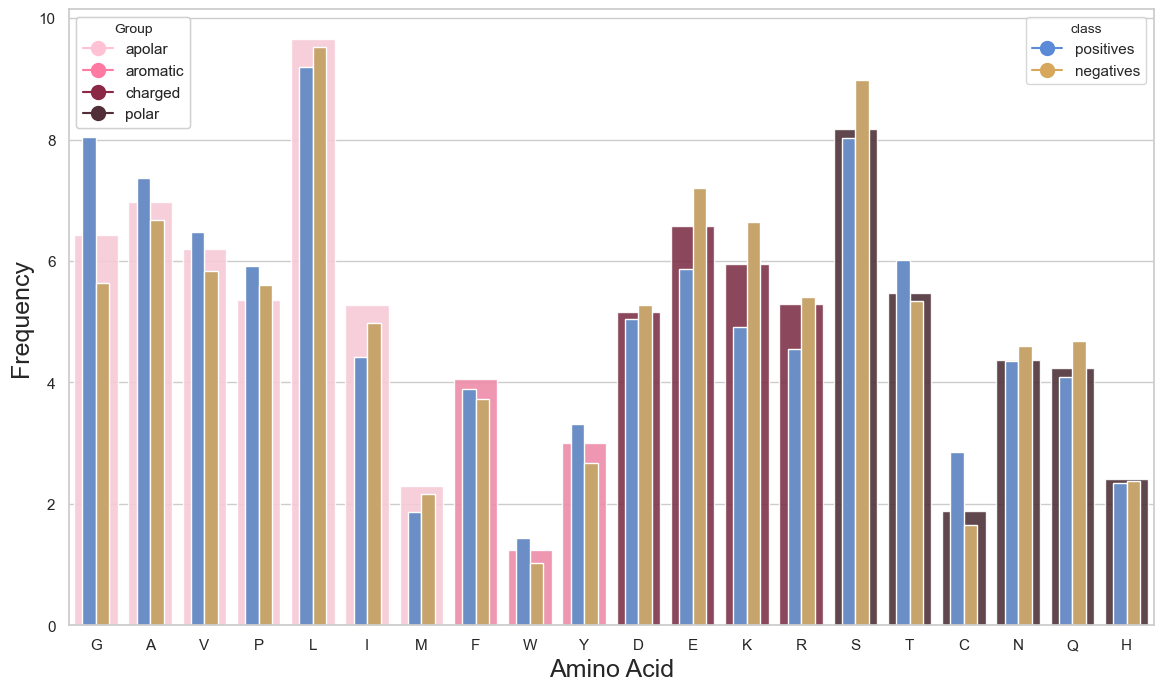

In [ ]:
#graph
#concatenate the training and the benchmarking datasets together
pos_vs_neg = pd.concat([pos_freq,neg_freq],ignore_index=True)

#plot the training and the benchmarking frequencies over the background frequencies
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

sns.barplot(data=euk_freq, x='aa', y='freq',hue='Group', palette=['#ffc2d4','#ff7aa2','#8a2846','#522e38'], order=aa_order, dodge=False, width=0.8, alpha=0.9)
sns.barplot(data=pos_vs_neg, x='aa', y='freq', hue='class', palette=['#5B8AD7','#D7A85B'], width=0.5, order = aa_order)

#['#222E50','#007991','#439A86','#BCD8C1']['#ff9505','#ffc971']
plt.xlabel('Amino Acid',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
#plt.title('Differences in amino acid composition of the C-comp in positive and negative sets compared to the background ditribution (SwissProt-eukaryotes)')

# Define custom legend labels, colors, and marker styles (using 'o' for circular markers)
legend_labels1 = {'positives': ('#5B8AD7', 'o'), 'negatives': ('#D7A85B', 'o')}
legend_labels2 = {'apolar': ('#ffc2d4', 'o'), 'aromatic': ('#ff7aa2', 'o'), 'charged': ('#8a2846', 'o'), 'polar': ('#522e38', 'o')}

# Create custom legend handles (lines with circular markers) and labels for the first plot
legend_handles1 = [mlines.Line2D([], [], color=color, marker=marker, markersize=10, label=label) for label, (color, marker) in legend_labels1.items()]
legend_labels1 = list(legend_labels1.keys())  # Use the legend labels as-is

# Create custom legend handles (lines with circular markers) and labels for the second plot
legend_handles2 = [mlines.Line2D([], [], color=color, marker=marker, markersize=10, label=label) for label, (color, marker) in legend_labels2.items()]
legend_labels2 = list(legend_labels2.keys())  # Use the legend labels as-is

# Create a custom legend for the first plot
legend1 = plt.legend(handles=legend_handles1, title="class", loc="upper right", labels=legend_labels1)
legend1.get_title().set_fontsize('10')  # Adjust the legend title font size here

# Create a custom legend for the second plot
legend2 = plt.legend(handles=legend_handles2, title="Group", loc="upper left", labels=legend_labels2)
legend2.get_title().set_fontsize('10')  # Adjust the legend title font size here


# Add both legends to the plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

#plt.legend(title='Legend', loc='upper right')
plt.savefig('figures/data_preparation/residue_composition_SPnonSP.svg')


### 2.4 Taxonomic classification (at kingdom and species levels)

Pie charts to display the **kingdom** distribution in the **training and benchmarking** dataset

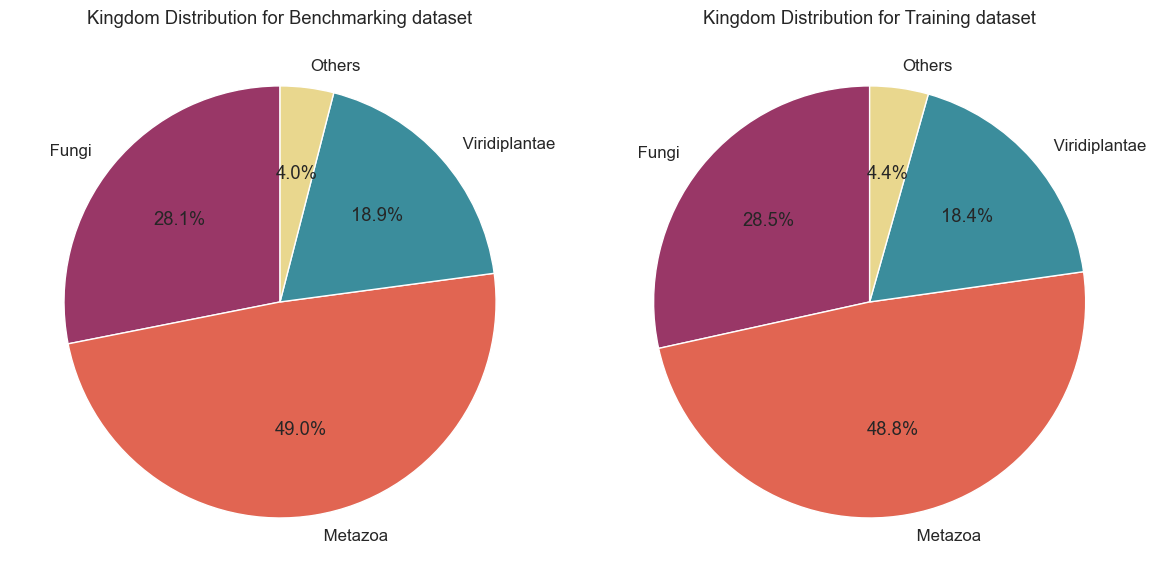

In [ ]:
# Group the DataFrame by 'dataset' and 'Kingdom' and count the occurrences
grouped = both.groupby(['dataset', 'Kingdom']).size().unstack(fill_value=0)

# Create pie charts for each group
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.set(font_scale=1.1)

custom_palette_benchmarking = ["#993767","#e16552","#3b8d9c","#e9d78e"]
custom_palette_training = ["#993767","#e16552","#3b8d9c","#e9d78e"]

# Pie chart for 'benchmarking' dataset
axes[0].pie(grouped.loc['benchmarking'], labels=grouped.columns, autopct='%1.1f%%', startangle=90, colors = custom_palette_benchmarking)
axes[0].set_title('Kingdom Distribution for Benchmarking dataset')

# Pie chart for 'training' dataset
axes[1].pie(grouped.loc['training'], labels=grouped.columns, autopct='%1.1f%%', startangle=90, colors = custom_palette_training)
axes[1].set_title('Kingdom Distribution for Training dataset')

plt.tight_layout()
plt.savefig('figures/data_preparation/kingdom_BenTr.svg')

#palette ["993767","be5168","e16552","e2975d","e9d78e","3b8d9c"]

Pie charts to display the **kingdom**** distribution in the **positives and negatives** set

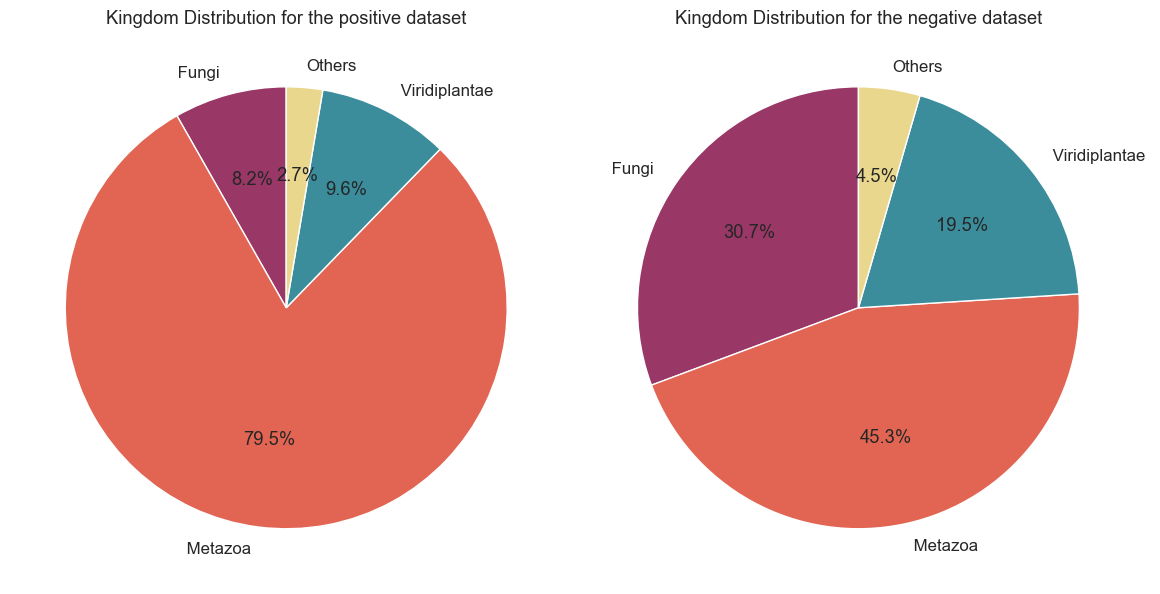

In [ ]:
# Group the DataFrame by 'dataset' and 'Kingdom' and count the occurrences
grouped_class = both.groupby(['class', 'Kingdom']).size().unstack(fill_value=0)

# Create pie charts for each group
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.set(font_scale=1.1)

custom_palette_positives = ["#993767","#e16552","#3b8d9c","#e9d78e"]
custom_palette_negatives = ["#993767","#e16552","#3b8d9c","#e9d78e"]

# Pie chart for 'benchmarking' dataset
axes[0].pie(grouped_class.loc['positives'], labels=grouped_class.columns, autopct='%1.1f%%', startangle=90, colors = custom_palette_positives)
axes[0].set_title('Kingdom Distribution for the positive dataset')

# Pie chart for 'training' dataset
axes[1].pie(grouped_class.loc['negatives'], labels=grouped_class.columns, autopct='%1.1f%%', startangle=90, colors = custom_palette_negatives)
axes[1].set_title('Kingdom Distribution for the negative dataset')

plt.tight_layout()
plt.savefig('figures/data_preparation/kingdom_SPnonSP.svg')


Visualization of the **top 10 most frequent species** both in the benchmarking and in the training set

In [ ]:
count_species_benchmarking = benchmarking.groupby(['Species']).size().reset_index(name='Count')
count_species_training = training.groupby(['Species']).size().reset_index(name='Count')

count_species_benchmarking['Frequency'] = (count_species_benchmarking['Count']/(count_species_benchmarking['Count'].sum()))*100
count_species_benchmarking['Dataset'] = 'benchmarking'
count_species_benchmarking = count_species_benchmarking.sort_values('Frequency', ascending=False)

count_species_training['Frequency'] = (count_species_training['Count']/(count_species_training['Count'].sum()))*100
count_species_training['Dataset'] = 'training'
count_species_training = count_species_training.sort_values('Frequency',ascending=False)


top_10_species = pd.concat([count_species_benchmarking.head(10), count_species_training.head(10)], ignore_index=True)


In both cases the top 10 most frequent species sum up to over the **80%** of the total:
- top 10 species benchmarking: 82.01506591337099 %
- top 10 species training: 81.6768723504475 %

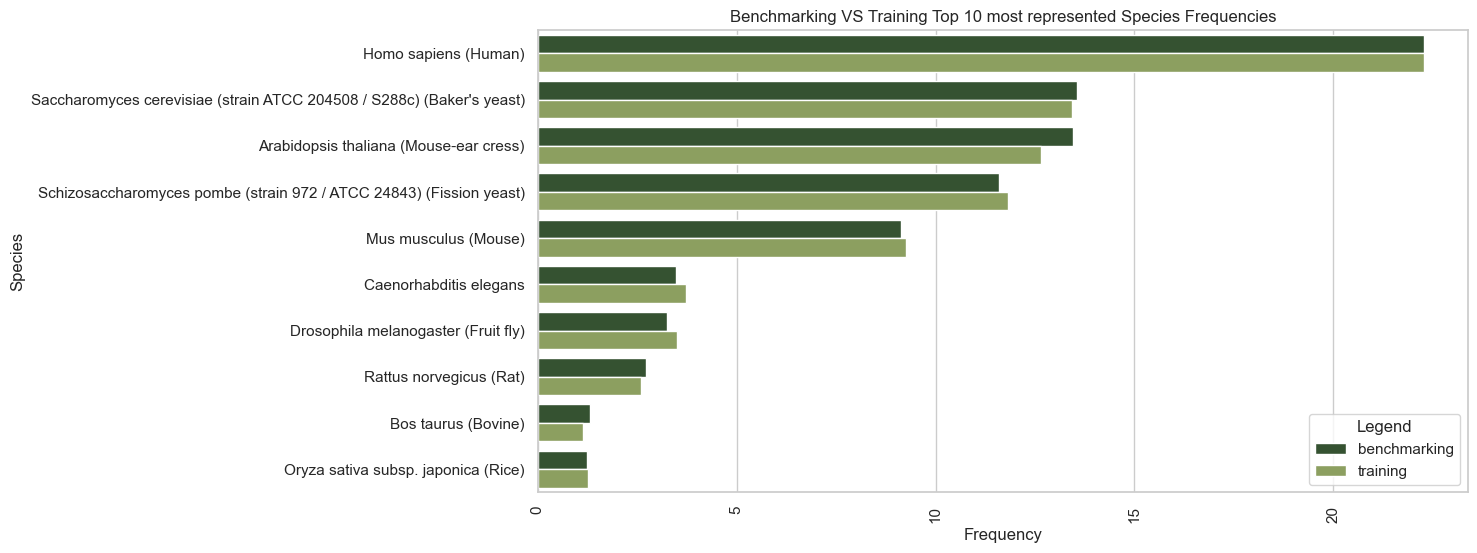

In [ ]:
# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


sns.barplot(data=top_10_species, x='Frequency', y='Species', hue = 'Dataset', palette=['#31572c','#90a955'])
#['#006e90','#f18f01']
#['#c1c06b','#5e5f98']
plt.xlabel('Frequency')
plt.ylabel('Species')
plt.title('Benchmarking VS Training Top 10 most represented Species Frequencies')
plt.legend(title='Legend', loc='lower right')

plt.xticks(rotation=90)
plt.savefig('figures/data_preparation/speciesBenTra.svg', bbox_inches='tight')



Visualize the **top 10 most frequent species** in the **positive and negative** sets

In [ ]:
count_species_positives = positives.groupby(['Species']).size().reset_index(name='Count')
count_species_negatives = negatives.groupby(['Species']).size().reset_index(name='Count')

count_species_positives['Frequency'] = (count_species_positives['Count']/(count_species_positives['Count'].sum()))*100
count_species_positives['Dataset'] = 'positives'
count_species_positives = count_species_positives.sort_values('Frequency', ascending=False)

count_species_negatives['Frequency'] = (count_species_negatives['Count']/(count_species_negatives['Count'].sum()))*100
count_species_negatives['Dataset'] = 'negatives'
count_species_negatives = count_species_negatives.sort_values('Frequency',ascending=False)


top_10_species_positives = count_species_positives.head(10)
top_10_species_negatives = count_species_negatives.head(10)

top_10_species_positives

,Species,Count,Frequency,Dataset
126,Homo sapiens (Human),340,31.107045,positives
166,Mus musculus (Mouse),60,5.489478,positives
228,Rattus norvegicus (Rat),56,5.123513,positives
47,Bos taurus (Bovine),47,4.300091,positives
258,Sus scrofa (Pig),26,2.378774,positives
236,Saccharomyces cerevisiae (strain ATCC 204508 /...,21,1.921317,positives
27,Arabidopsis thaliana (Mouse-ear cress),16,1.463861,positives
111,Gallus gallus (Chicken),14,1.280878,positives
191,Oryza sativa subsp. japonica (Rice),13,1.189387,positives
94,Drosophila melanogaster (Fruit fly),13,1.189387,positives


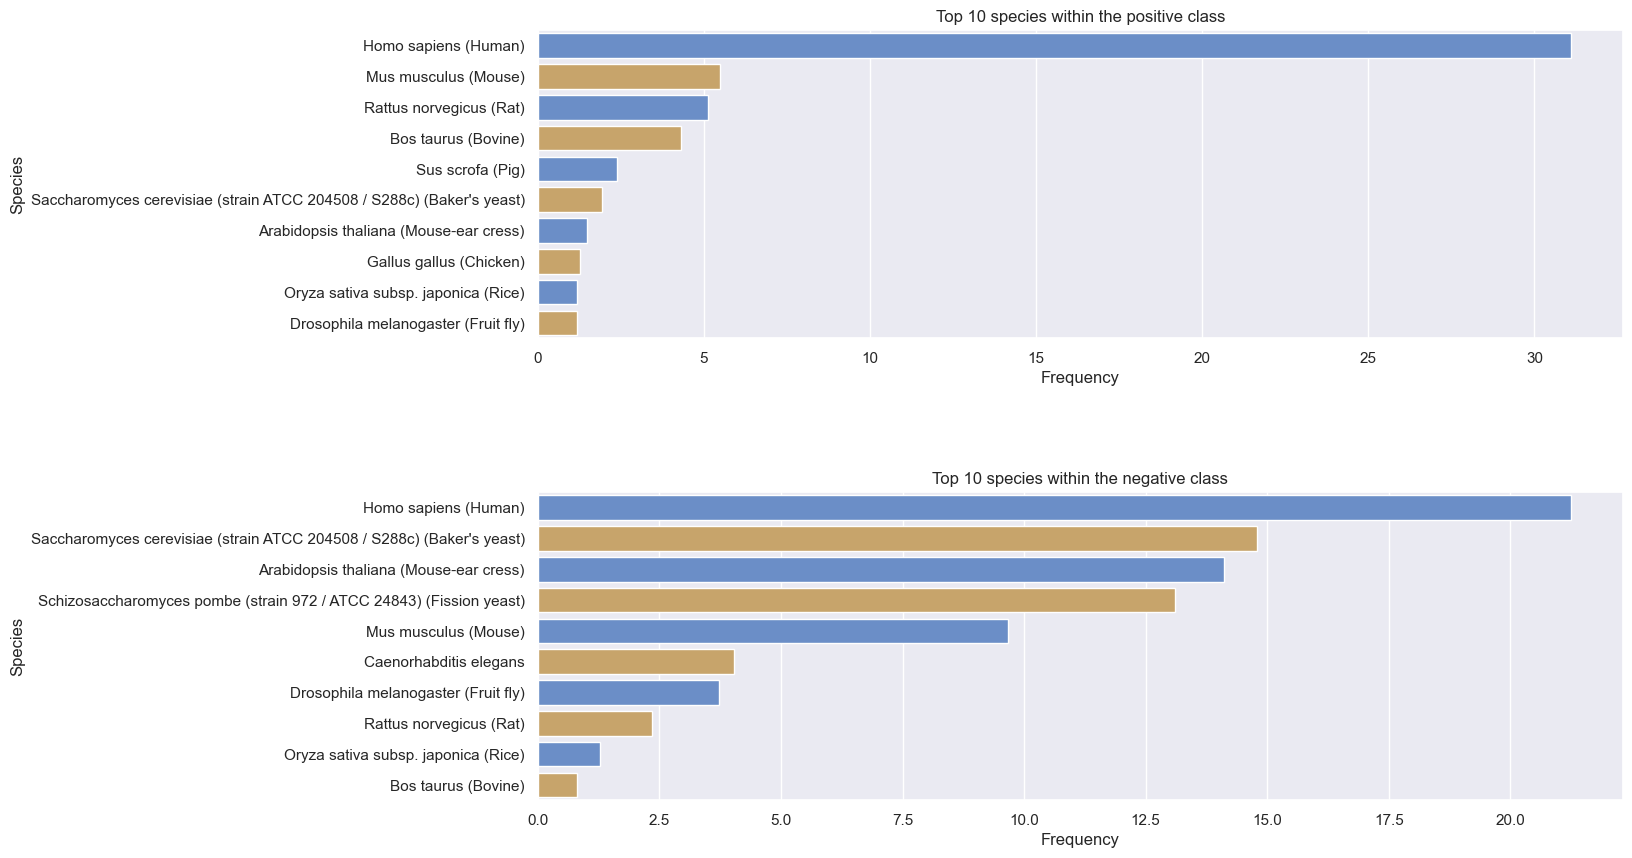

In [ ]:


# plot the graphs
sns.set_theme(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(wspace=1,hspace=0.5)

sns.barplot(data=top_10_species_positives, x='Frequency', y='Species', palette=['#5B8AD7','#D7A85B'],ax=ax1)
ax1.set_title("Top 10 species within the positive class")

sns.barplot(data=top_10_species_negatives, x='Frequency', y='Species', palette=['#5B8AD7','#D7A85B'],ax=ax2)
ax2.set_title("Top 10 species within the negative class")
plt.savefig('figures/data_preparation/Species_SPnonSP.svg', bbox_inches='tight')


### 2.6 Sequence logo


##### Training Sequence logo

In [ ]:
with open('cleavage_sites_training.txt', 'w') as f:
    for item, row in both.iterrows():
        if row['dataset'] == 'training':
            if row['class'] == 'positives':
                cleavage_site = row['Sequence'][(int(row['Signal peptide'])-13):(int(row['Signal peptide'])+2)]
                f.write(cleavage_site+'\n')


##### Benchmarking Sequence logo

In [ ]:

with open('cleavage_sites_benchmarking.txt', 'w') as f2:
    for item, row in both.iterrows():
        if row['dataset'] == 'benchmarking':
            if row['class'] == 'positives':
                cleavage_site = row['Sequence'][(int(row['Signal peptide'])-13):(int(row['Signal peptide'])+2)]
                f2.write(cleavage_site+'\n')